In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales_2024.csv')
data.columns = data.columns.str.strip()
data.head()

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal,Description
0,2111,01-01-2024,Sale,4800.00,Cash,SYED RAHAMATHULLA,9642172276,GARGEPURAM,KURNOOL,518452,ANDHRA PRADESH,1,4067.80,247.00,0,4067.80,4800.00,TSH 2 D
1,2112,01-01-2024,Sale,7100.01,Cash,PRABHAKAR,9494731655,NDL CHECK POST,KURNOOL,518002,ANDHRA PRADESH,1,6016.95,317.00,0,6016.95,7100.01,TRH 525 H
2,2113,01-01-2024,Sale,14000.01,Cash,G.MADHU,9052667961,VELDURTHI,KURNOOL,518216,ANDHRA PRADESH,1,11864.41,1040.00,0,11864.41,14000.01,TSP 3
3,2114,01-01-2024,Sale,12610.00,Cash,E.PRATHAP REDDY,7702172728,KURNOOL,KURNOOL,518003,ANDHRA PRADESH,1,10686.44,0.00,0,10686.44,12610.00,F100 4P1.1S
4,2115,01-01-2024,Sale,14500.07,Cash,P.HASAIN KHAN,9603893941,LAL MASID ROAD,KURNOOL,518001,ANDHRA PRADESH,1,12288.19,539.94,0,12288.19,14500.07,TSP 3


EDA


In [3]:
data.isnull().sum()

InvoiceNumber           0
Date                    0
InvoiceType             0
NetAmount               0
PaymentMethod           0
CustomerName            0
CustomerMobileNumber    0
Address1                0
City                    0
Pincode                 0
State                   0
Quantity                0
UnitPrice               0
Discount                0
PromotionalDiscount     0
BasicAmount             0
ItemTotal               0
Description             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   InvoiceNumber         2498 non-null   int64  
 1   Date                  2498 non-null   object 
 2   InvoiceType           2498 non-null   object 
 3   NetAmount             2498 non-null   float64
 4   PaymentMethod         2498 non-null   object 
 5   CustomerName          2498 non-null   object 
 6   CustomerMobileNumber  2498 non-null   int64  
 7   Address1              2498 non-null   object 
 8   City                  2498 non-null   object 
 9   Pincode               2498 non-null   int64  
 10  State                 2498 non-null   object 
 11  Quantity              2498 non-null   int64  
 12  UnitPrice             2498 non-null   float64
 13  Discount              2498 non-null   float64
 14  PromotionalDiscount   2498 non-null   int64  
 15  BasicAmount          

In [5]:
data.describe()

,InvoiceNumber,NetAmount,CustomerMobileNumber,Pincode,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal
count,2498.000000,2498.000000,2.498000e+03,2498.000000,2498.000000,2498.000000,2498.000000,2498.0,2498.000000,2498.000000
mean,1359.116093,20194.195232,9.087610e+09,517476.230584,1.234988,16768.898511,804.678195,0.0,16911.291077,19955.323995
std,895.429570,13178.830194,9.183671e+08,3065.549407,5.757030,10199.061813,974.398408,0.0,10400.521448,12272.615023
min,1.000000,4600.010000,6.281094e+09,500038.000000,1.000000,118.640000,0.000000,0.0,3898.310000,4600.010000
25%,594.250000,14500.000000,8.790708e+09,518002.000000,1.000000,12288.140000,0.000000,0.0,12288.140000,14500.000000
50%,1215.500000,15040.000000,9.440733e+09,518003.000000,1.000000,12712.030000,540.000000,0.0,12742.830000,15036.540000
75%,2285.750000,21150.010000,9.703405e+09,518010.000000,1.000000,17880.930000,1039.870000,0.0,17923.730000,21150.010000
max,2906.000000,157000.050000,9.989963e+09,585317.000000,170.000000,73177.370000,7799.650000,0.0,84576.440000,99800.200000


Location-Based Demand Analysis


In [6]:
cities = data.groupby('City')['ItemTotal'].sum().sort_values(ascending=False)
states = data.groupby('State')['ItemTotal'].sum().sort_values(ascending=False)

In [7]:
print(cities)
print(states)

City
KURNOOL                   22897599.51
KURNOOL                   16098630.42
KURNOOL DIST               4306277.38
JOGULAMBA GADWALA DIST      736394.44
RAJOLI                      282506.97
                             ...     
ALAMPUR X ROAD                4999.58
DHARMAVARAM                   4900.00
BUKAPAURAM                    4800.00
UNDAVELLI                     4800.00
THUMILLA                      4700.00
Name: ItemTotal, Length: 129, dtype: float64
State
ANDHRA PRADESH    46183061.52
TELANGANA          3608327.41
KARNATAKA            57010.41
Name: ItemTotal, dtype: float64


In [8]:
pinncode = data.groupby('Pincode')['ItemTotal'].sum().sort_values(ascending=False)

In [9]:
print(pinncode)

Pincode
518003    11574955.82
518002    10479624.27
518010     4226934.72
518004     3279184.60
518466     2944998.12
             ...     
518488       12500.00
518347       12400.24
509103       12000.01
509382       10000.02
509137        5047.00
Name: ItemTotal, Length: 71, dtype: float64


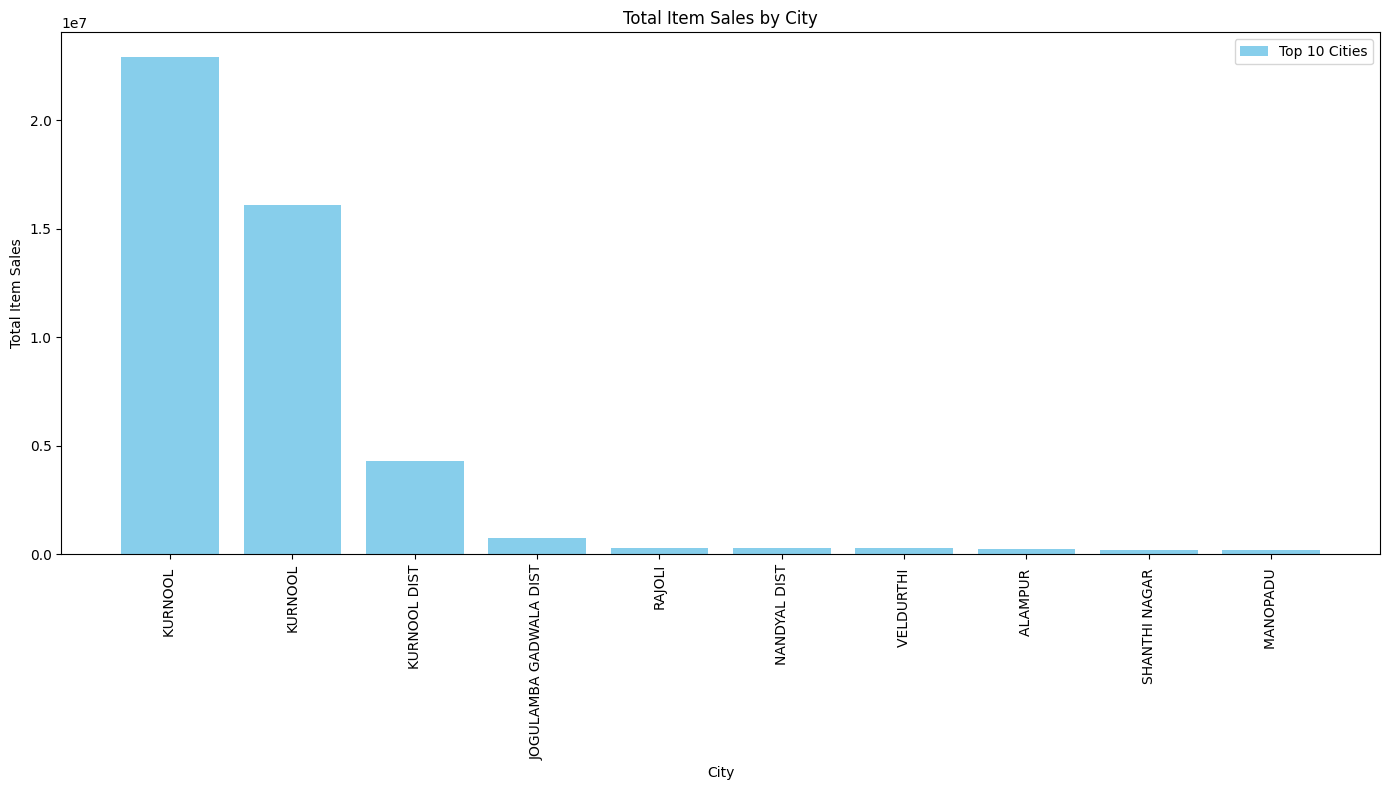

In [10]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[:10], cities.values[:10], color='skyblue', label='Top 10 Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

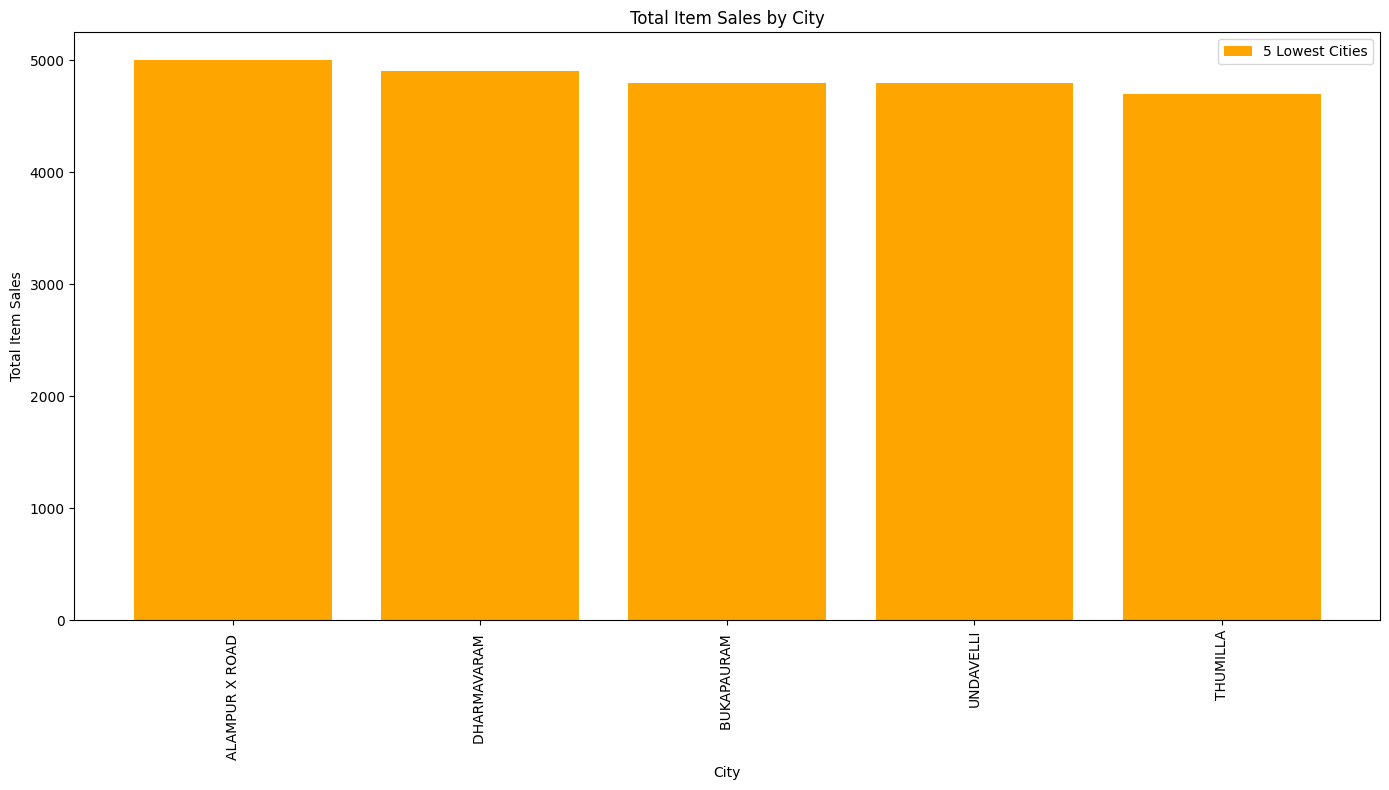

In [11]:
plt.figure(figsize=(14,8))
plt.bar(cities.index[-5:], cities.values[-5:], color='orange', label='5 Lowest Cities')
plt.legend()
plt.xlabel('City')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\96328267.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


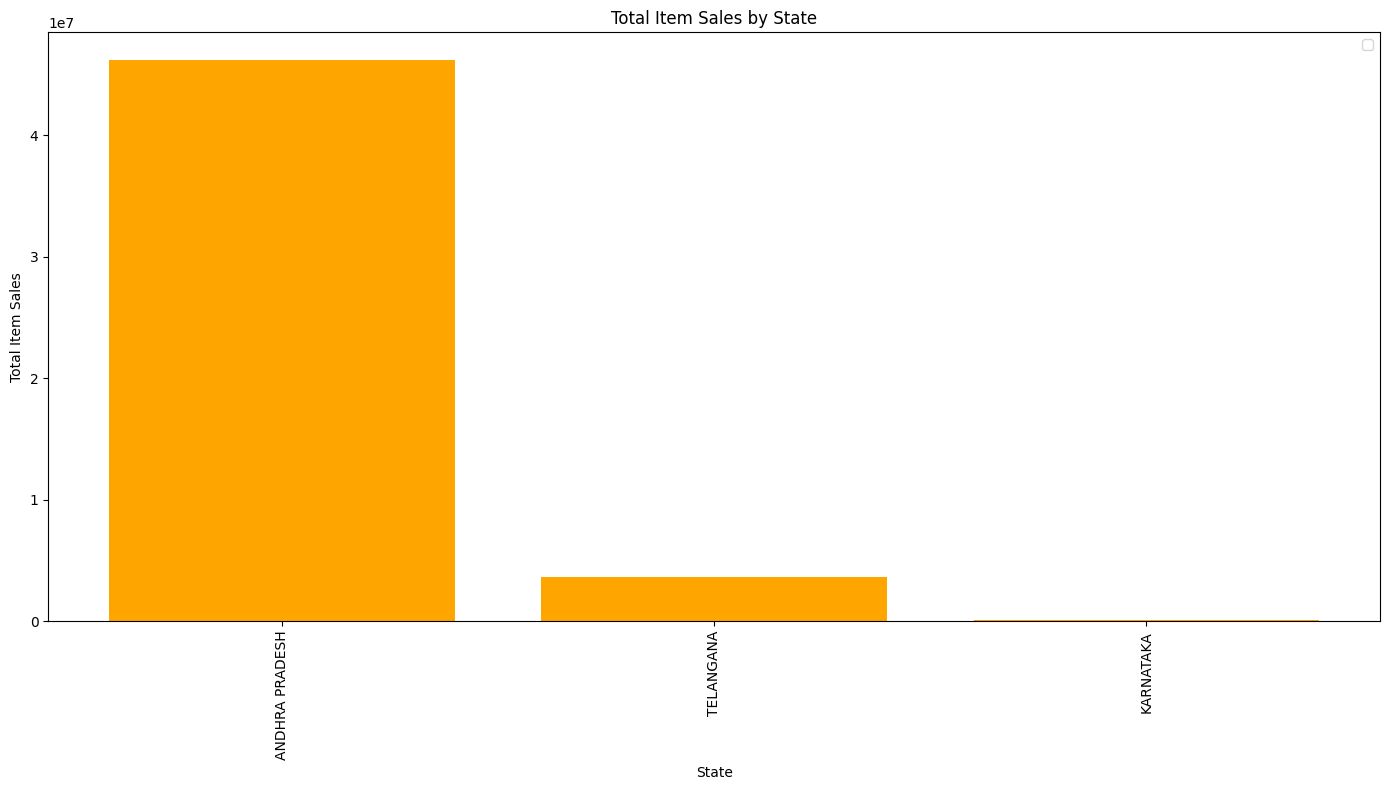

In [12]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange')
plt.legend()
plt.xlabel('State')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

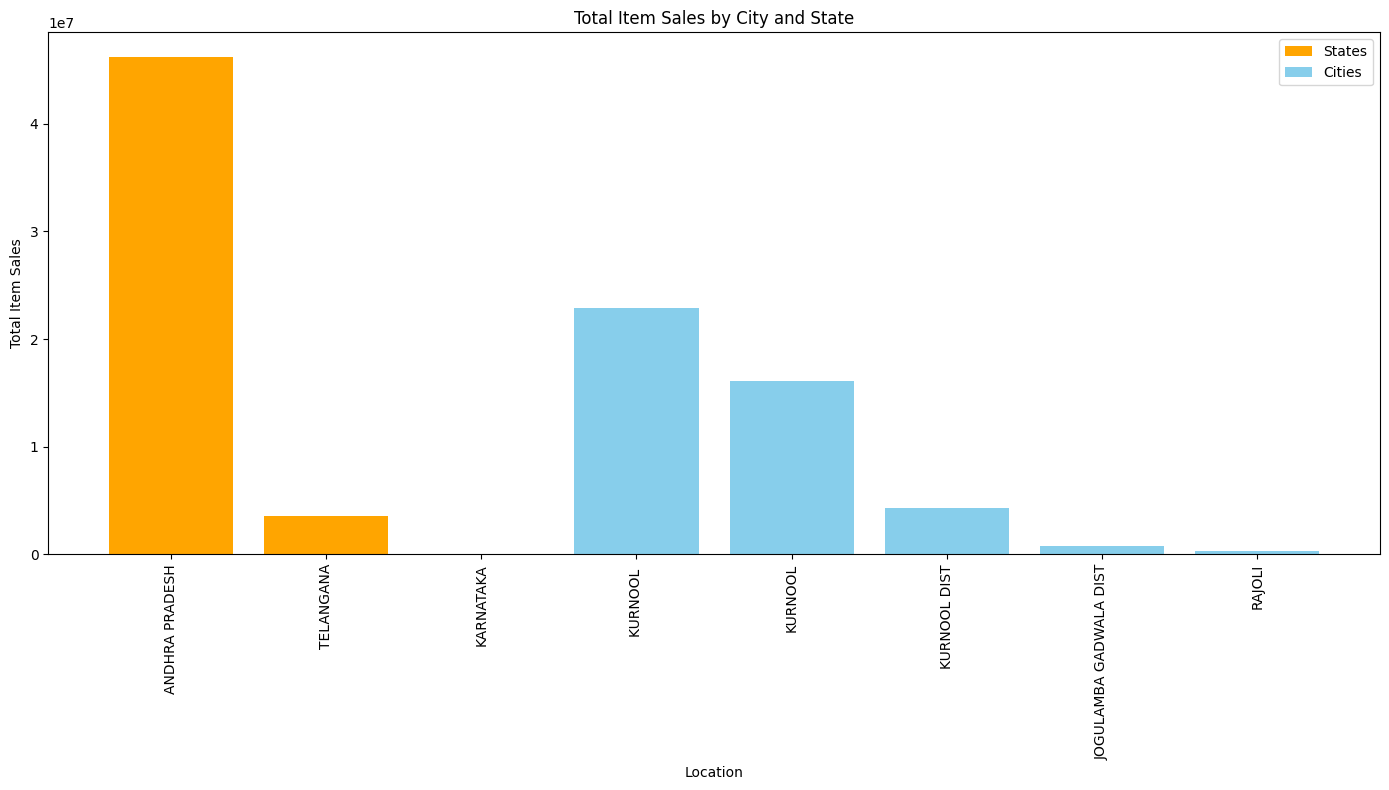

In [13]:
plt.figure(figsize=(14,8))
plt.bar(states.index, states.values, color='orange', label='States')
plt.bar(cities.index[:5], cities.values[:5], color='skyblue', label='Cities')
plt.legend()
plt.xlabel('Location')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by City and State')
plt.savefig("state_citi.jpg")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

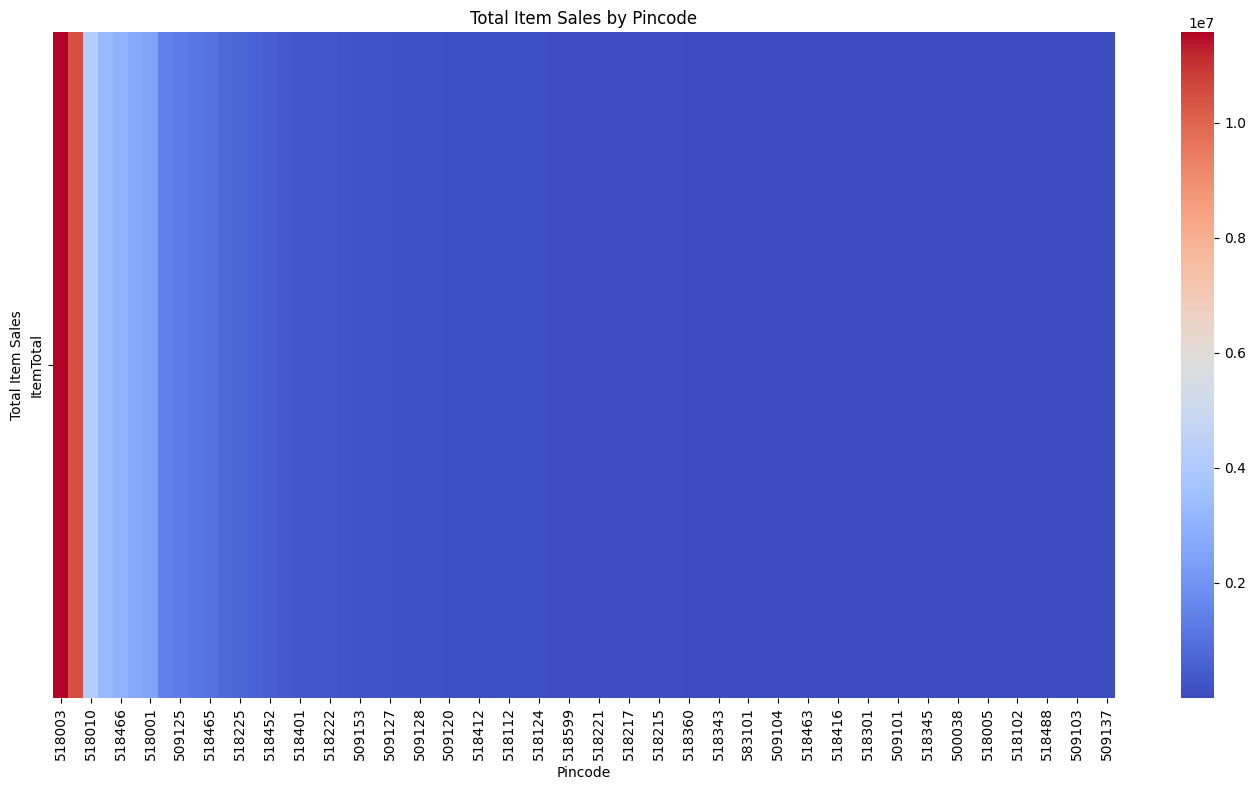

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(pinncode.to_frame().T, cmap='coolwarm', cbar=True)
plt.xlabel('Pincode')
plt.ylabel('Total Item Sales')
plt.title('Total Item Sales by Pincode')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
data['CustomerName'] = data['CustomerName'].str.strip()

In [16]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [17]:
data.head(3)

,InvoiceNumber,Date,InvoiceType,NetAmount,PaymentMethod,CustomerName,CustomerMobileNumber,Address1,City,Pincode,State,Quantity,UnitPrice,Discount,PromotionalDiscount,BasicAmount,ItemTotal,Description
0,2111,2024-01-01,Sale,4800.00,Cash,SYED RAHAMATHULLA,9642172276,GARGEPURAM,KURNOOL,518452,ANDHRA PRADESH,1,4067.80,247.0,0,4067.80,4800.00,TSH 2 D
1,2112,2024-01-01,Sale,7100.01,Cash,PRABHAKAR,9494731655,NDL CHECK POST,KURNOOL,518002,ANDHRA PRADESH,1,6016.95,317.0,0,6016.95,7100.01,TRH 525 H
2,2113,2024-01-01,Sale,14000.01,Cash,G.MADHU,9052667961,VELDURTHI,KURNOOL,518216,ANDHRA PRADESH,1,11864.41,1040.0,0,11864.41,14000.01,TSP 3


In [68]:
data['CustomerName'] = data['CustomerName'].astype(str)
data['CustomerMobileNumber'] = data['CustomerMobileNumber'].astype(str)

In [69]:
customer_df = data.groupby(['CustomerName', 'CustomerMobileNumber']).agg({
    'InvoiceNumber': 'count',                         # Frequency / Visits
    'NetAmount': 'sum',                               # Monetary
    'Date': ['min', 'max'],                           # Recency and First visit
    'City': pd.Series.mode,                           # Most frequent city
    'Description': lambda x: ', '.join(x.unique())    # Unique models
}).reset_index()

customer_df.columns = ['CustomerName', 'CustomerMobileNumber',
                       'Frequency', 'TotalSpend', 'FirstPurchase', 'LastPurchase',
                       'City', 'ModelsPurchased']

In [70]:
today = data['Date'].max()
customer_df['Recency'] = (today - customer_df['LastPurchase']).dt.days
customer_df['AvgSpend'] = customer_df['TotalSpend'] / customer_df['Frequency']
customer_df['TimeBetweenVisits'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days


In [71]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'TotalSpend']])
scaled_df = pd.DataFrame(scaled, columns=['RecencyNorm', 'FrequencyNorm', 'MonetaryNorm'], index=customer_df.index)


In [72]:
customer_df['Score'] = (
    (1 - scaled_df['RecencyNorm']) * 0.4 +
    scaled_df['FrequencyNorm'] * 0.3 +
    scaled_df['MonetaryNorm'] * 0.3
)

In [73]:
def label_segment(row):
    if row['Frequency'] == 1:
        return "One-time Buyer"
    elif row['Score'] >= 0.8:
        return "VIP Customer"
    elif row['Score'] >= 0.5:
        return "Regular Customer"
    else:
        return "Location-focused"

In [74]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'TotalSpend']])
scaled_df = pd.DataFrame(scaled, columns=['RecencyNorm', 'FrequencyNorm', 'MonetaryNorm'], index=customer_df.index)


In [75]:
customer_df['Score'] = (
    (1 - scaled_df['RecencyNorm']) * 0.4 +
    scaled_df['FrequencyNorm'] * 0.3 +
    scaled_df['MonetaryNorm'] * 0.3
)

In [76]:
def label_segment(row):
    if row['Frequency'] == 1:
        return "One-time Buyer"
    elif row['Score'] >= 0.8:
        return "VIP Customer"
    elif row['Score'] >= 0.5:
        return "Regular Customer"
    else:
        return "Location-focused"

In [77]:
customer_df['Segment'] = customer_df.apply(label_segment, axis=1)


In [79]:
import os

os.makedirs("outputs", exist_ok=True)
customer_df.to_csv("outputs/customer_segments_output_new_2024.csv")

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\1519516665.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('piechart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


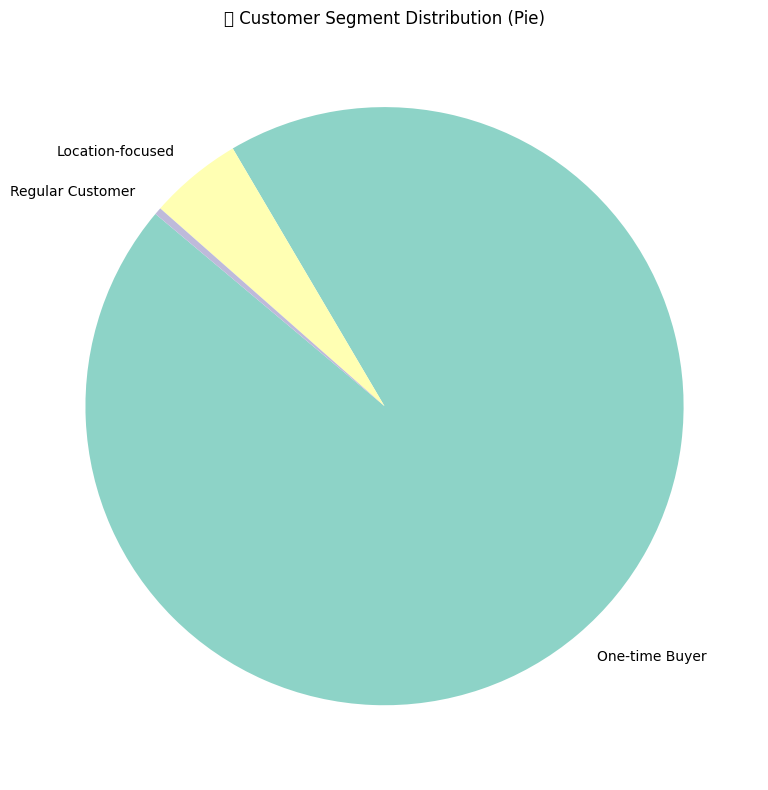

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\1519516665.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\1519516665.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('barchart.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


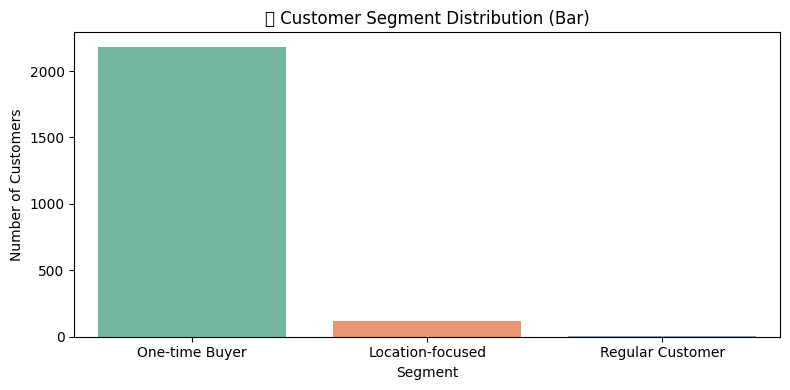

In [59]:
segment_counts = customer_df['Segment'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
segment_counts.plot.pie( startangle=140, colors=sns.color_palette('Set3'))
plt.title("📊 Customer Segment Distribution (Pie)")
plt.ylabel("")
plt.savefig('piechart.jpg')
plt.tight_layout()
plt.show()

# Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title("📊 Customer Segment Distribution (Bar)")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.savefig('barchart.jpg')
plt.tight_layout()
plt.show()

In [30]:
model_sales = data.groupby('Description')['NetAmount'].sum().sort_values(ascending=False)


In [34]:
print("\n🔢 Total Sales Value per Model:")
print(model_sales)


🔢 Total Sales Value per Model:
Description
TSP 3                     16706582.94
TRF 518 HS + SF011-URC     3168893.74
TRF 513 HS + SF007-URC     2439270.27
TRF 710 HS + SF007-URC     1426960.91
TMH 6 H                    1274905.56
                             ...     
F100L 4P1                    12300.01
HCS 8050-RF                  11959.99
TMH 61                       10700.00
HCS 7050-R                   10500.01
HCS 7030 H                   10400.00
Name: NetAmount, Length: 169, dtype: float64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\867554590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')


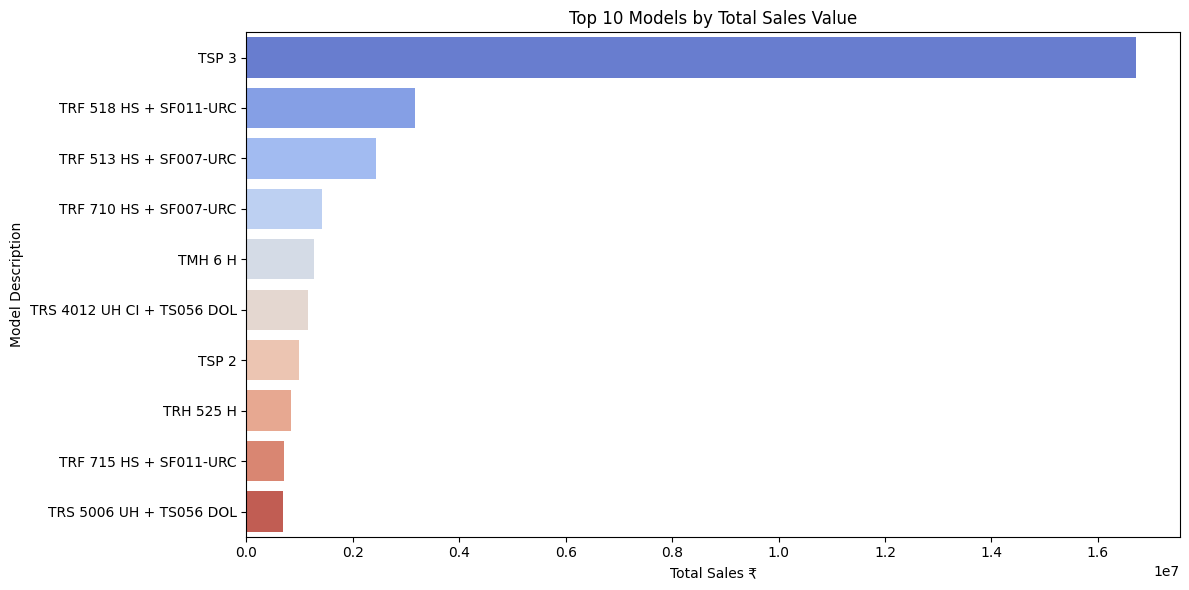

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_sales.head(10).values, y=model_sales.head(10).index, palette='coolwarm')
plt.title("Top 10 Models by Total Sales Value")
plt.xlabel("Total Sales ₹")
plt.savefig('ModelImage.jpg')
plt.ylabel("Model Description")
plt.tight_layout()
plt.show()

In [38]:
units_sold = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nUnits Sold per Model:")
print(units_sold)


Units Sold per Model:
Description
TSP 3                                             1130
3 Core Flat 4 Sq.mm (1100V) ISI, Black (1000m)     575
TRF 518 HS + SF011-URC                             151
TRF 513 HS + SF007-URC                             136
TRH 525 H                                          112
                                                  ... 
TRS 5014 UH + TS130 X                                1
TSM 14 H                                             1
TSM 6 ZRC DOL                                        1
TVSM 3502 S DOL                                      1
TW6 4010-075 6T056-C3642                             1
Name: Quantity, Length: 169, dtype: int64


C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\337574638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')


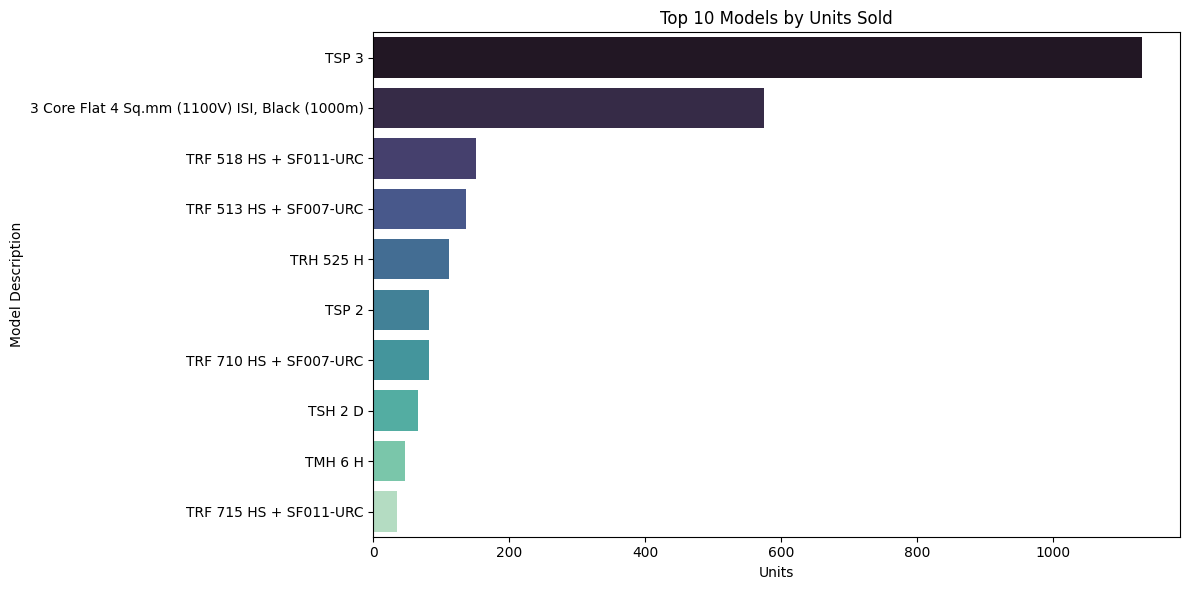

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x=units_sold.head(10).values, y=units_sold.head(10).index, palette='mako')
plt.title("Top 10 Models by Units Sold")
plt.xlabel("Units")
plt.ylabel("Model Description")
plt.savefig('unitssold.jpg')
plt.tight_layout()
plt.show()

In [42]:
model_city_sales = data.groupby(['Description', 'City'])['NetAmount'].sum().reset_index()
pivot_model_city = model_city_sales.pivot(index='Description', columns='City', values='NetAmount').fillna(0)


In [44]:
top_models = model_sales.head(10).index
top_cities = data['City'].value_counts().head(5).index
filtered_pivot = pivot_model_city.loc[top_models, top_cities]

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\666707358.py:6: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


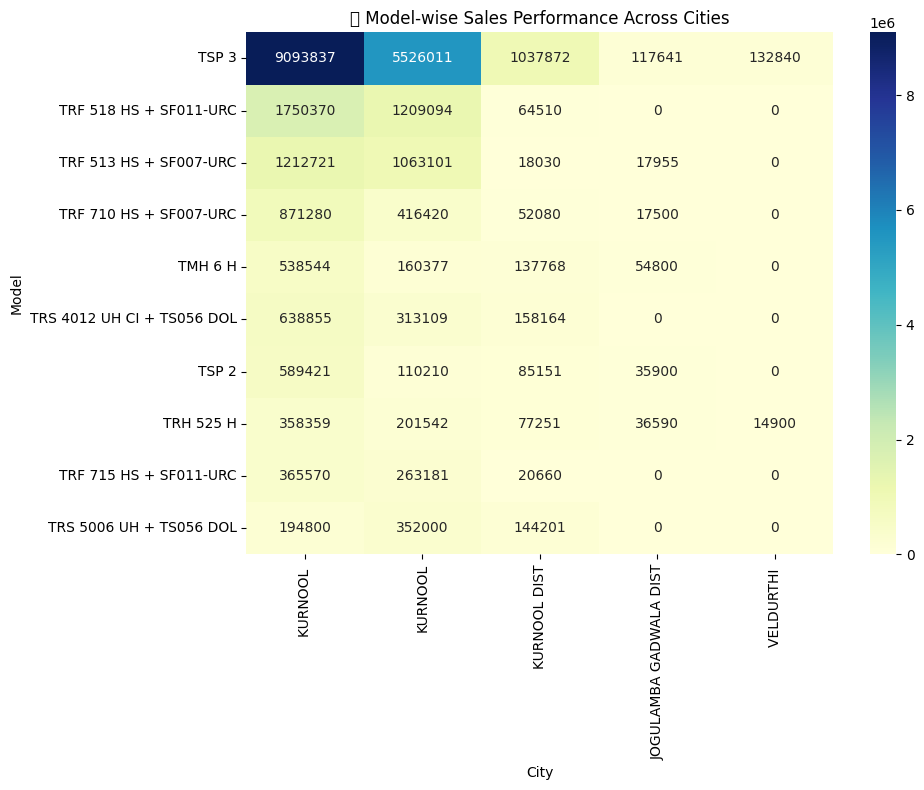

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(filtered_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📍 Model-wise Sales Performance Across Cities")
plt.xlabel("City")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\3740065485.py:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Unique Customers.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


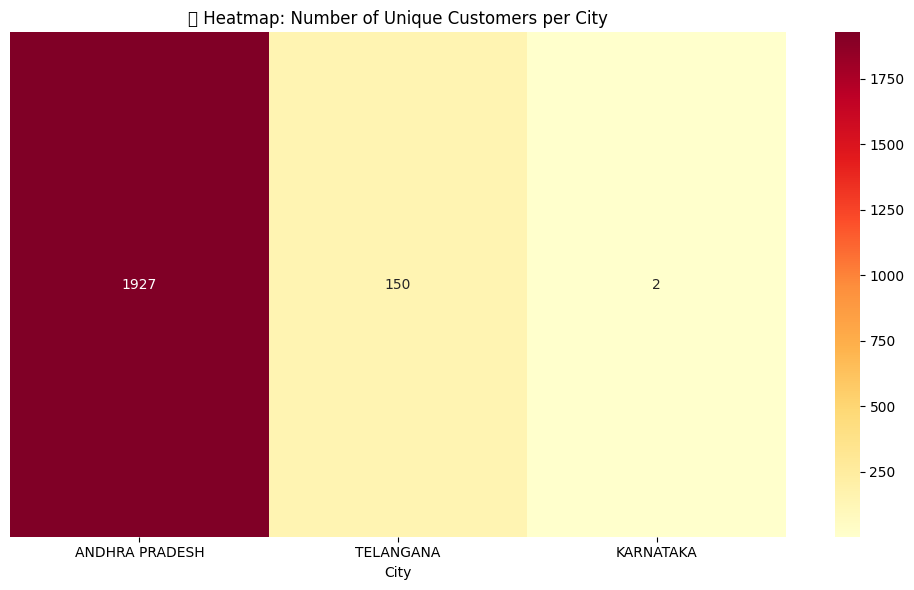

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\3740065485.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("heatmap of Sales per State.jpg")
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


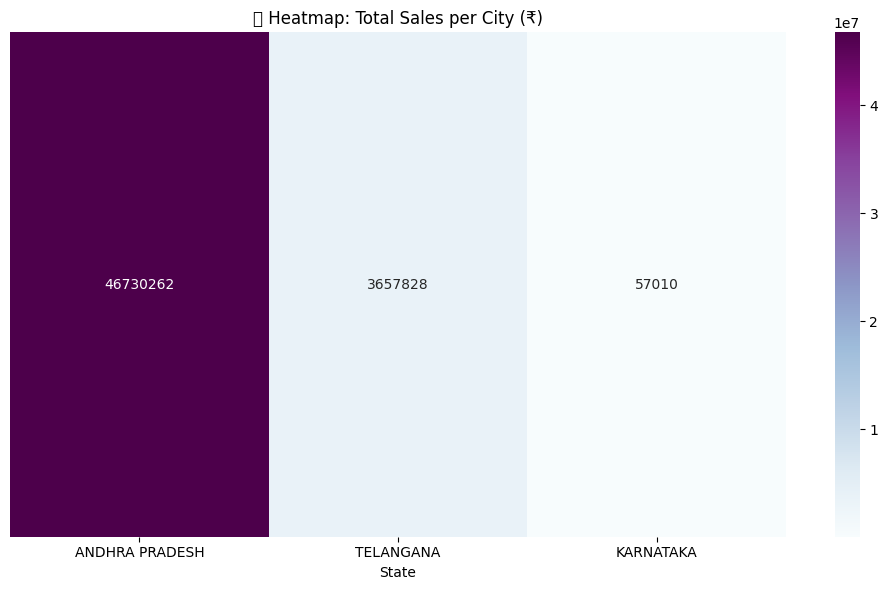

In [56]:
city_customer_counts = data.groupby('State')['CustomerName'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(city_customer_counts.to_frame().T, cmap='YlOrRd', annot=True, fmt='d')
plt.title("📍 Heatmap: Number of Unique Customers per City")
plt.yticks([])
plt.xlabel("City")
plt.savefig("heatmap of Unique Customers.jpg")
plt.tight_layout()
plt.show()

state_sales = data.groupby('State')['NetAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(state_sales.to_frame().T, cmap='BuPu', annot=True, fmt=".0f")
plt.title("📍 Heatmap: Total Sales per City (₹)")
plt.yticks([])
plt.xlabel("State")
plt.savefig("heatmap of Sales per State.jpg")
plt.tight_layout()
plt.show()


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


data['YearMonth'] = data['Date'].dt.to_period('M').astype(str) 

In [ ]:
monthly_sales = data.groupby('YearMonth')['NetAmount'].sum().reset_index()

C:\Users\RP DIGIPRESS\AppData\Local\Temp\ipykernel_2608\3854303556.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('Sales Per Month.jpg')
c:\Users\RP DIGIPRESS\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


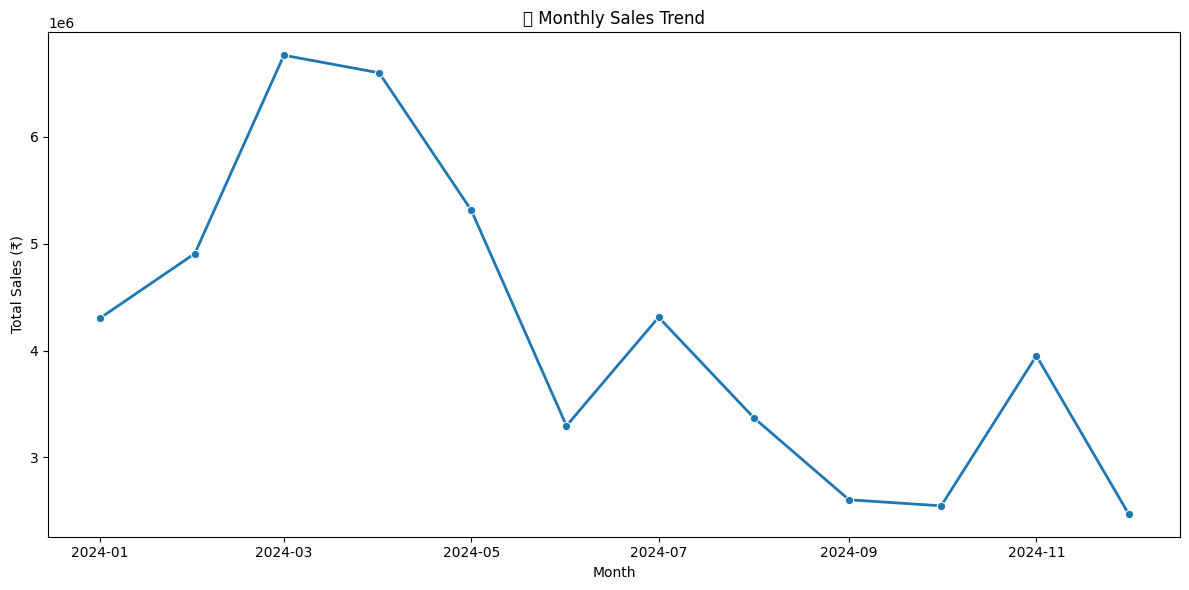

In [58]:
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='NetAmount', marker='o', linewidth=2)
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.savefig('Sales Per Month.jpg')
plt.tight_layout()
plt.show()